# <center> Proyecto Final
# <center> Métodos de DL para  Análisis de Tractografía Mediante Datos de dMRI.
<center> Institution: Centro de Investigación en Matemáticas A.C. 
<center> Gabriel Alejandro Aguilar Farrera  
<center> David Alejandro Muro Campa
<center> Course: Tópicos Selectos de Ciencia de Datos (Deep Learning)
    

# Código para convertir archivos trk a tck

In [1]:
# Importamos las librerías necesarias
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from dipy.io.stateful_tractogram import Space, StatefulTractogram
from dipy.io.streamline import load_tractogram, save_tractogram
from dipy.io.utils import (create_nifti_header, get_reference_info,
                           is_header_compatible)
from dipy.tracking.streamline import select_random_set_of_streamlines
from dipy.tracking.utils import density_map

from dipy.data.fetcher import (fetch_file_formats,
                               get_file_formats)
import dipy.io.streamline as st
import fury

from dipy.viz import window, actor

In [24]:
reference_anatomy = nib.load("T1.nii")  # DWI de referencia

# Lista de archivos trk
list_trk = ['CP.trk',
           'Fornix.trk',
           'ICP_left.trk',
           'ICP_right.trk',
           'ILF_left.trk',
           'ILF_right.trk',
           'MCP.trk',
           'OR_left.trk',
           'OR_right.trk',
           'SCP_left.trk',
           'SCP_right.trk',
           'SLF_left.trk',
           'SLF_right.trk',
           'UF_left.trk',
           'UF_right.trk',
           'BPS_left.trk',
           'BPS_right.trk',
           'CA.trk',
           'CC.trk',
           'Cingulum_left.trk',
           'Cingulum_right.trk']

# Ciclo para convertir todos los archivos trk de la lista a tck
for trk in list_trk:
    fibers_fib = load_tractogram(trk,reference_anatomy)
    path_name = os.path.splitext(trk)[0]
    tck = path_name + ".tck"
    print(trk)
    print(tck)
    save_tractogram(fibers_fib,tck)

CP.trk
CP.tck
Fornix.trk
Fornix.tck
ICP_left.trk
ICP_left.tck
ICP_right.trk
ICP_right.tck
ILF_left.trk
ILF_left.tck
ILF_right.trk
ILF_right.tck
MCP.trk
MCP.tck
OR_left.trk
OR_left.tck
OR_right.trk
OR_right.tck
SCP_left.trk
SCP_left.tck
SCP_right.trk
SCP_right.tck
SLF_left.trk
SLF_left.tck
SLF_right.trk
SLF_right.tck
UF_left.trk
UF_left.tck
UF_right.trk
UF_right.tck
BPS_left.trk
BPS_left.tck
BPS_right.trk
BPS_right.tck
CA.trk
CA.tck
CC.trk
CC.tck
Cingulum_left.trk
Cingulum_left.tck
Cingulum_right.trk
Cingulum_right.tck


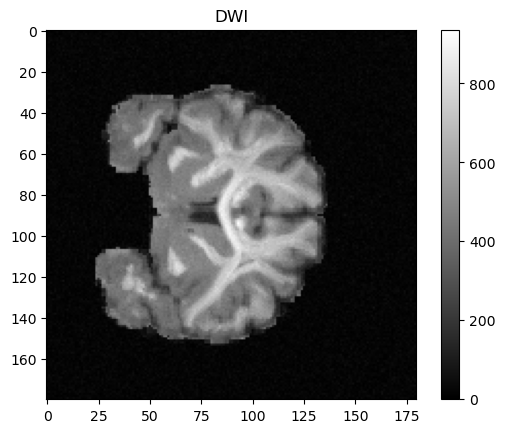

In [50]:
# Graficar DWI
reference_anatomy = nib.load("T1.nii")  # DWI de referencia
anatomy_data = reference_anatomy.get_fdata()

anatomy_data_rotated = np.rot90(anatomy_data, k=0)  # k=1 indica una rotación de 90 grados

# Graficar la imagen
plt.imshow(anatomy_data_rotated[:, 80, :], cmap='gray')  # Cambiar el valor 70 a la sección que se desea visualizar
plt.title('DWI')
plt.colorbar()
#plt.savefig('100.png', format='png')

In [36]:
# Graficar Tractografias
tractography_file = "MCP.tck"
reference_anatomy = nib.load("T1.nii")  # Cargar la imagen anatómica de referencia
tractogram = load_tractogram(tractography_file, reference_anatomy)

# Crear una escena 3D para visualizar las tractografías
scene = window.Scene()

# Agregar las tractografías a la escena
streamline_actor = actor.line(tractogram.streamlines, window.colors.white)
scene.add(streamline_actor)

# Configurar la escena 3D
window.show(scene)

# Para mostrar la ventana interactiva, asegúrate de ejecutar la aplicación de ventana principal de Dipy:
# window.record(scene, out_path='tractografia.png', size=(800, 800))

In [52]:
# Ruta de los archivos TCK
tck_files = ['CP.tck', 'Fornix.tck', 'ICP_left.tck', 'ICP_right.tck',
             'ILF_left.tck', 'ILF_right.tck', 'MCP.tck', 'OR_left.tck',
             'OR_right.tck', 'SCP_left.tck', 'SCP_right.tck',
             'SLF_left.tck', 'SLF_right.tck', 'UF_left.tck', 'UF_right.tck',
             'BPS_left.tck', 'BPS_right.tck', 'CA.tck', 'CC.tck',
             'Cingulum_left.tck', 'Cingulum_right.tck']

for tck_file in tck_files:
    # Cargar la tractografía desde el archivo TCK
    tractogram = load_tractogram(tck_file, reference_anatomy)

    # Contar el número de streamlines en la tractografía
    num_streamlines = len(tractogram.streamlines)

    # Imprimir el nombre del archivo y el número de streamlines
    print(f'Archivo TCK: {tck_file}, Número de Streamlines: {num_streamlines}')


Archivo TCK: CP.tck, Número de Streamlines: 365
Archivo TCK: Fornix.tck, Número de Streamlines: 3827
Archivo TCK: ICP_left.tck, Número de Streamlines: 4217
Archivo TCK: ICP_right.tck, Número de Streamlines: 3224
Archivo TCK: ILF_left.tck, Número de Streamlines: 11164
Archivo TCK: ILF_right.tck, Número de Streamlines: 10630
Archivo TCK: MCP.tck, Número de Streamlines: 21008
Archivo TCK: OR_left.tck, Número de Streamlines: 7252
Archivo TCK: OR_right.tck, Número de Streamlines: 9524
Archivo TCK: SCP_left.tck, Número de Streamlines: 1795
Archivo TCK: SCP_right.tck, Número de Streamlines: 1560
Archivo TCK: SLF_left.tck, Número de Streamlines: 12483
Archivo TCK: SLF_right.tck, Número de Streamlines: 11920
Archivo TCK: UF_left.tck, Número de Streamlines: 5899
Archivo TCK: UF_right.tck, Número de Streamlines: 6751
Archivo TCK: BPS_left.tck, Número de Streamlines: 11162
Archivo TCK: BPS_right.tck, Número de Streamlines: 15400
Archivo TCK: CA.tck, Número de Streamlines: 430
Archivo TCK: CC.tck, 

In [53]:
# Diccionario que relaciona nombres de archivos TCK con nombres de bundles completos en español
tck_to_bundle = {
    'CP.tck': 'Comisura del Papez',
    'Fornix.tck': 'Fórnix',
    'ICP_left.tck': 'Pedúnculo Cerebeloso Inferior (Izquierdo)',
    'ICP_right.tck': 'Pedúnculo Cerebeloso Inferior (Derecho)',
    'ILF_left.tck': 'Fascículo Longitudinal Inferior (Izquierdo)',
    'ILF_right.tck': 'Fascículo Longitudinal Inferior (Derecho)',
    'MCP.tck': 'Pedúnculo Cerebeloso Medio',
    'OR_left.tck': 'Radiación Óptica (Izquierda)',
    'OR_right.tck': 'Radiación Óptica (Derecha)',
    'SCP_left.tck': 'Pedúnculo Cerebeloso Superior (Izquierdo)',
    'SCP_right.tck': 'Pedúnculo Cerebeloso Superior (Derecho)',
    'SLF_left.tck': 'Fascículo Longitudinal Superior (Izquierdo)',
    'SLF_right.tck': 'Fascículo Longitudinal Superior (Derecho)',
    'UF_left.tck': 'Fascículo Uncinado (Izquierdo)',
    'UF_right.tck': 'Fascículo Uncinado (Derecho)',
    'BPS_left.tck': 'Sistema de Pedúnculos del Tronco Encefálico (Izquierdo)',
    'BPS_right.tck': 'Sistema de Pedúnculos del Tronco Encefálico (Derecho)',
    'CA.tck': 'Comisura Anterior',
    'CC.tck': 'Cuerpo Calloso',
    'Cingulum_left.tck': 'Cíngulo (Izquierdo)',
    'Cingulum_right.tck': 'Cíngulo (Derecho)'
}

for tck_file in tck_files:
    # Obtener el nombre completo del bundle en español a partir del diccionario
    bundle_name = tck_to_bundle.get(tck_file, 'Nombre no encontrado')

    # Cargar la tractografía desde el archivo TCK
    tractogram = load_tractogram(tck_file, reference_anatomy)

    # Contar el número de streamlines en la tractografía
    num_streamlines = len(tractogram.streamlines)

    # Imprimir el nombre del bundle en español y el número de streamlines
    print(f'Bundle: {bundle_name}, Número de Streamlines: {num_streamlines}')


Bundle: Comisura del Papez, Número de Streamlines: 365
Bundle: Fórnix, Número de Streamlines: 3827
Bundle: Pedúnculo Cerebeloso Inferior (Izquierdo), Número de Streamlines: 4217
Bundle: Pedúnculo Cerebeloso Inferior (Derecho), Número de Streamlines: 3224
Bundle: Fascículo Longitudinal Inferior (Izquierdo), Número de Streamlines: 11164
Bundle: Fascículo Longitudinal Inferior (Derecho), Número de Streamlines: 10630
Bundle: Pedúnculo Cerebeloso Medio, Número de Streamlines: 21008
Bundle: Radiación Óptica (Izquierda), Número de Streamlines: 7252
Bundle: Radiación Óptica (Derecha), Número de Streamlines: 9524
Bundle: Pedúnculo Cerebeloso Superior (Izquierdo), Número de Streamlines: 1795
Bundle: Pedúnculo Cerebeloso Superior (Derecho), Número de Streamlines: 1560
Bundle: Fascículo Longitudinal Superior (Izquierdo), Número de Streamlines: 12483
Bundle: Fascículo Longitudinal Superior (Derecho), Número de Streamlines: 11920
Bundle: Fascículo Uncinado (Izquierdo), Número de Streamlines: 5899
Bu

In [5]:
import nibabel as nib
import dipy.tracking.utils as ut

# Ruta al archivo .nii (DWI)
dwi_file_path = 'T1.nii'

# Ruta al archivo .tck (Tractografía)
tractography_file_path = 'CA.tck'

# Cargamos el archivo DWI
dwi_img = nib.load(dwi_file_path)
dwi_data = dwi_img.get_fdata()

In [17]:
# Cargamos la tractografía
tractogram = load_tractogram(tractography_file_path, dwi_file_path)

# Obtener las secuencias de vectores DWI para cada streamline en la tractografía
for i, streamline in enumerate(tractogram.streamlines):
    # Inicializar una lista para almacenar la secuencia de vectores DWI
    dwi_sequence = []

    for point in streamline:
        x, y, z = point.astype(int)
        dwi_vector = dwi_data[x, y, z]
        dwi_sequence.append(dwi_vector)

    # Ahora, dwi_sequence contiene la secuencia de vectores DWI a lo largo de este streamline
#    print(f'Streamline {i+1}:')
#    print(dwi_sequence)

In [18]:
dwi_sequence

[427.0,
 449.0,
 416.0,
 463.0,
 470.0,
 463.0,
 453.0,
 442.0,
 437.0,
 432.0,
 464.0,
 460.0,
 460.0,
 417.0,
 448.0,
 453.0,
 414.0,
 425.0,
 404.0,
 366.0,
 439.0,
 467.0,
 467.0,
 482.0,
 474.0,
 474.0,
 418.0,
 433.0,
 329.0,
 334.0,
 288.0,
 260.0,
 334.0,
 425.0,
 302.0,
 231.0,
 254.0,
 278.0,
 349.0,
 336.0,
 385.0,
 227.0,
 219.0,
 380.0,
 468.0,
 499.0,
 487.0,
 499.0,
 420.0,
 488.0,
 463.0,
 446.0,
 410.0,
 286.0,
 232.0,
 224.0,
 347.0,
 345.0,
 447.0,
 448.0,
 448.0,
 442.0,
 446.0,
 438.0,
 465.0,
 467.0,
 426.0,
 471.0,
 418.0,
 449.0,
 437.0,
 422.0,
 415.0,
 415.0,
 442.0,
 422.0,
 422.0,
 461.0,
 476.0,
 466.0,
 448.0,
 433.0,
 432.0]